In [ ]:
# import libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
warnings.filterwarnings("ignore")
df = pd.read_csv("Train_Test_IoT_GPS_Tracker.csv")
df.head()

,ts,date,time,latitude,longitude,label,type
0,1556242299,25-Apr-19,18:31:39,116.521704,132.162504,1,ddos
1,1556242301,25-Apr-19,18:31:41,121.742933,135.072500,1,ddos
2,1556242306,25-Apr-19,18:31:46,121.795929,135.110198,1,ddos
3,1556242309,25-Apr-19,18:31:49,116.611216,132.224555,1,ddos
4,1556242311,25-Apr-19,18:31:51,121.841526,135.151362,1,ddos


In [ ]:
# address missing value
df.isnull().sum()
missing_count = df.isnull().sum() # the count of missing values
value_count = df.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100, 1) #the percentage of missing values
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) #create a dataframe
print(missing_df)

           count  percentage
ts             0         0.0
date           0         0.0
time           0         0.0
latitude       0         0.0
longitude      0         0.0
label          0         0.0
type           0         0.0


In [ ]:
# calculate duplicates 
dups = df.duplicated() 
# report if there are any duplicates 
print(dups.any()) 
# list all duplicate rows 
print(df[dups])
print(df.shape) 
# delete duplicate rows 
df.drop_duplicates(inplace=True) 
print(df.shape)


False
Empty DataFrame
Columns: [ts, date, time, latitude, longitude, label, type]
Index: []
(58960, 7)
(58960, 7)


In [ ]:
type('date')

str

In [ ]:
type('time')

str

In [ ]:
df['date'] = pd.to_datetime(df['date'])
print(df)

               ts       date        time    latitude   longitude  label  \
0      1556242299 2019-04-25   18:31:39   116.521704  132.162504      1   
1      1556242301 2019-04-25   18:31:41   121.742933  135.072500      1   
2      1556242306 2019-04-25   18:31:46   121.795929  135.110198      1   
3      1556242309 2019-04-25   18:31:49   116.611216  132.224555      1   
4      1556242311 2019-04-25   18:31:51   121.841526  135.151362      1   
...           ...        ...         ...         ...         ...    ...   
58955  1554202928 2019-04-02     4:02:08    1.028628   10.810522      0   
58956  1554202928 2019-04-02     4:02:08    0.345361   10.727989      0   
58957  1554202928 2019-04-02     4:02:08    0.423384   10.508036      0   
58958  1554202928 2019-04-02     4:02:08    0.445292   10.381356      0   
58959  1554202928 2019-04-02     4:02:08    0.532691   10.345983      0   

         type  
0        ddos  
1        ddos  
2        ddos  
3        ddos  
4        ddos  
...

In [ ]:
#Transform string to date
df['date'] = pd.to_datetime(df.date, format="%d-%m-%Y")

In [ ]:
#Extracting Year
df['year'] = df['date'].dt.year

#Extracting Month
df['month'] = df['date'].dt.month

#Extracting the weekday name of the date
df['day_name'] = df['date'].dt.day_name()

In [ ]:
# dealing with attribute time
#new data frame with split value columns
new = df['time'].str.split(':',n=2,expand=True)

In [ ]:
# making separate first name column from new data frame
df["hour"]= new[0]
df["min"]= new[1]
df["sec"]= new[2]

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['hour'] = df['hour'].astype(int)

In [ ]:
df.month.unique()


array([4, 3])

In [ ]:
df.hour.unique()

array([18, 19,  8,  9, 10, 11, 12, 20, 21,  6,  7, 14, 15, 16, 13,  3,  4,
        5, 22, 23, 17])

In [ ]:
import numpy as np
df['hour_sin'] = np.sin((df.hour-1)*(2.*np.pi/24))
df['hour_cos'] = np.cos((df.hour-1)*(2.*np.pi/24))

df['month_sin'] = np.sin((df.month-1)*(2.*np.pi/12))
df['month_cos'] = np.cos((df.month-1)*(2.*np.pi/12))

In [ ]:
df

,ts,date,time,latitude,longitude,label,type,year,month,day_name,hour,min,sec,hour_sin,hour_cos,month_sin,month_cos
0,1556242299,2019-04-25,18:31:39,116.521704,132.162504,1,ddos,2019,4,Thursday,18,31,39,-0.965926,-0.258819,1.0,6.123234e-17
1,1556242301,2019-04-25,18:31:41,121.742933,135.072500,1,ddos,2019,4,Thursday,18,31,41,-0.965926,-0.258819,1.0,6.123234e-17
2,1556242306,2019-04-25,18:31:46,121.795929,135.110198,1,ddos,2019,4,Thursday,18,31,46,-0.965926,-0.258819,1.0,6.123234e-17
3,1556242309,2019-04-25,18:31:49,116.611216,132.224555,1,ddos,2019,4,Thursday,18,31,49,-0.965926,-0.258819,1.0,6.123234e-17
4,1556242311,2019-04-25,18:31:51,121.841526,135.151362,1,ddos,2019,4,Thursday,18,31,51,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58955,1554202928,2019-04-02,4:02:08,1.028628,10.810522,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17
58956,1554202928,2019-04-02,4:02:08,0.345361,10.727989,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17
58957,1554202928,2019-04-02,4:02:08,0.423384,10.508036,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17
58958,1554202928,2019-04-02,4:02:08,0.445292,10.381356,0,normal,2019,4,Tuesday,4,02,08,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
# drop columns 
df = df.drop(['ts', 'time','type','date','min','sec','hour','month'], axis=1)

In [ ]:
df

,latitude,longitude,label,year,day_name,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...
58955,1.028628,10.810522,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17
58956,0.345361,10.727989,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17
58957,0.423384,10.508036,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17
58958,0.445292,10.381356,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
# transform hour to int
#df['hour'] = df['hour'].astype(int)

In [ ]:
#type('hour')

In [ ]:
# transform int to string
df['label'] = df['label'].astype(str)

In [ ]:
# populate the numerical and categorical variables
num_list = []
cat_list = []
for column in df:
   if column != 'label': # separate lable
       if is_numeric_dtype(df[column]):
           num_list.append(column)
       elif is_string_dtype(df[column]):
           cat_list.append(column)

In [ ]:
num_list


['latitude',
 'longitude',
 'year',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
cat_list

['day_name']

In [ ]:
### 2. Feature Engineering and EDA  ###

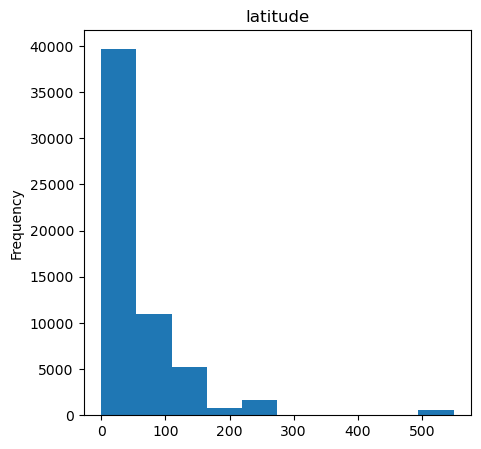

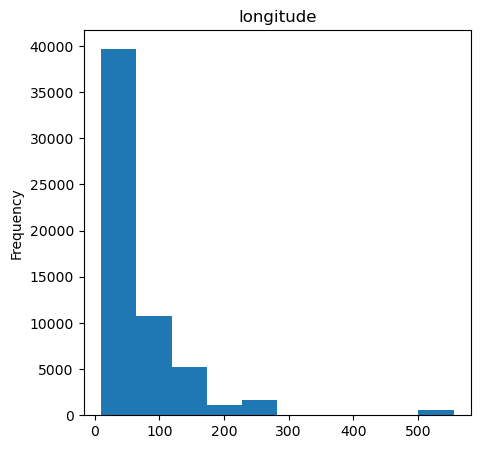

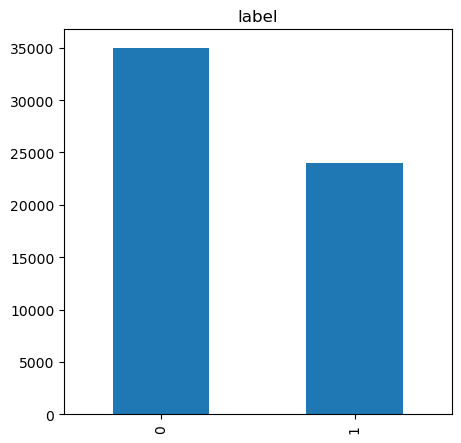

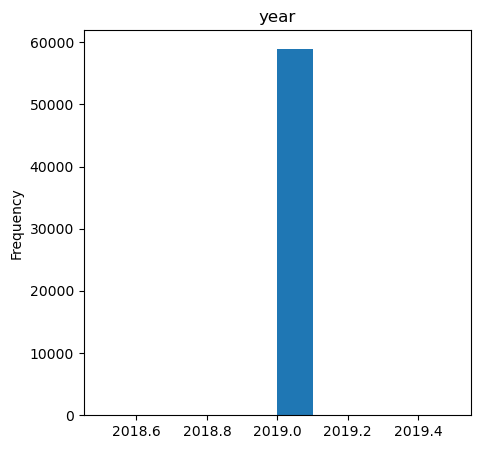

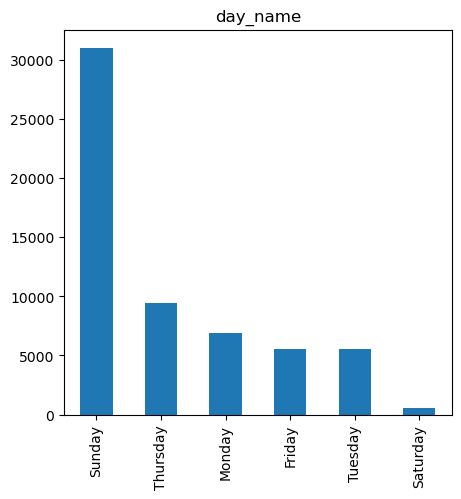

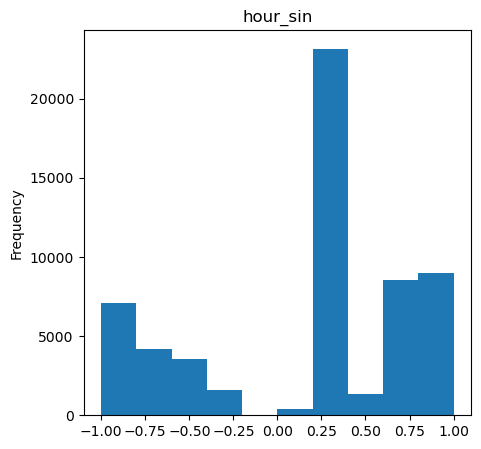

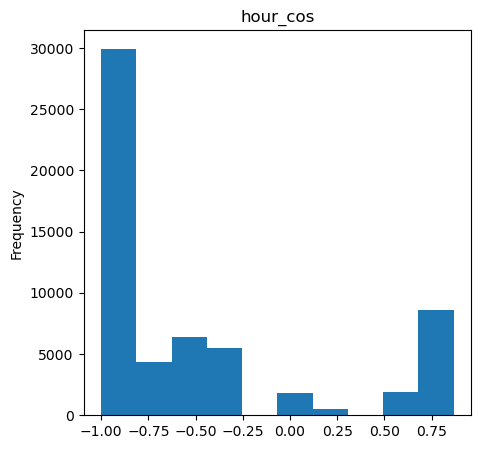

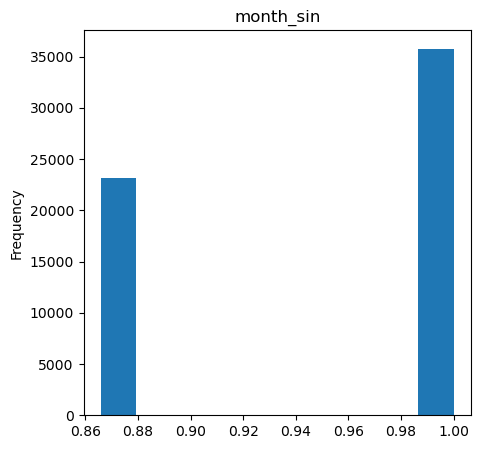

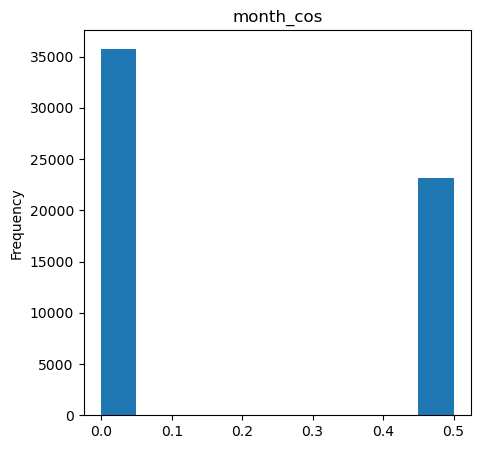

In [ ]:
# univariate analysis
for column in df:
   plt.figure(column, figsize = (5,5))
   plt.title(column)
   if is_numeric_dtype(df[column]):
       df[column].plot(kind = 'hist')
   elif is_string_dtype(df[column]):
       df[column].value_counts()[:10].plot(kind = 'bar')


In [ ]:
df

,latitude,longitude,label,year,day_name,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,1,2019,Thursday,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...
58955,1.028628,10.810522,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17
58956,0.345361,10.727989,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17
58957,0.423384,10.508036,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17
58958,0.445292,10.381356,0,2019,Tuesday,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
# encoding categorical data using dummies
from sklearn.preprocessing import LabelEncoder
categorical_features = ['label']
for i in categorical_features:
   df[i] = LabelEncoder().fit_transform(df[i])

In [ ]:
import category_encoders as ce
encoder= ce.BinaryEncoder(cols=['day_name'],return_df=True)

In [ ]:
df=encoder.fit_transform(df) 

In [ ]:
list(df.columns)

['latitude',
 'longitude',
 'label',
 'year',
 'day_name_0',
 'day_name_1',
 'day_name_2',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos']

In [ ]:
df

,latitude,longitude,label,year,day_name_0,day_name_1,day_name_2,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,1,2019,0,0,1,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,1,2019,0,0,1,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,1,2019,0,0,1,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,1,2019,0,0,1,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,1,2019,0,0,1,-0.965926,-0.258819,1.0,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...
58955,1.028628,10.810522,0,2019,1,0,1,0.707107,0.707107,1.0,6.123234e-17
58956,0.345361,10.727989,0,2019,1,0,1,0.707107,0.707107,1.0,6.123234e-17
58957,0.423384,10.508036,0,2019,1,0,1,0.707107,0.707107,1.0,6.123234e-17
58958,0.445292,10.381356,0,2019,1,0,1,0.707107,0.707107,1.0,6.123234e-17


In [ ]:
# select and rearrange columns
df = df[['latitude',
 'longitude',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos','day_name_0',
 'day_name_1',
 'day_name_2','label']]

In [ ]:
df.columns

Index(['latitude', 'longitude', 'hour_sin', 'hour_cos', 'month_sin',
       'month_cos', 'day_name_0', 'day_name_1', 'day_name_2', 'label'],
      dtype='object')

In [ ]:
#numerical variables for scaling
n = df.iloc[:,:-4]


In [ ]:
n.head()

,latitude,longitude,hour_sin,hour_cos,month_sin,month_cos
0,116.521704,132.162504,-0.965926,-0.258819,1.0,6.123234e-17
1,121.742933,135.072500,-0.965926,-0.258819,1.0,6.123234e-17
2,121.795929,135.110198,-0.965926,-0.258819,1.0,6.123234e-17
3,116.611216,132.224555,-0.965926,-0.258819,1.0,6.123234e-17
4,121.841526,135.151362,-0.965926,-0.258819,1.0,6.123234e-17


In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing

scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(n)
robust_df = pd.DataFrame(robust_df, columns =['latitude',
 'longitude',
 'hour_sin',
 'hour_cos',
 'month_sin',
 'month_cos'])

In [ ]:
# scaled numerical features
robust_df

,latitude,longitude,hour_sin,hour_cos,month_sin,month_cos
0,1.468038,1.543287,-1.014612,0.858719,0.0,0.0
1,1.536471,1.581430,-1.014612,0.858719,0.0,0.0
2,1.537165,1.581924,-1.014612,0.858719,0.0,0.0
3,1.469212,1.544100,-1.014612,0.858719,0.0,0.0
4,1.537763,1.582463,-1.014612,0.858719,0.0,0.0
...,...,...,...,...,...,...
58955,-0.045682,-0.047337,0.371374,2.224745,0.0,0.0
58956,-0.054638,-0.048419,0.371374,2.224745,0.0,0.0
58957,-0.053615,-0.051302,0.371374,2.224745,0.0,0.0
58958,-0.053328,-0.052962,0.371374,2.224745,0.0,0.0


In [ ]:
# extracting not scaled features (target feature + categorical features)
extracted_col= df[['day_name_0',
 'day_name_1',
 'day_name_2','label']]


In [ ]:
# reset index
robust_df.reset_index(drop=True, inplace=True)
extracted_col.reset_index(drop=True, inplace=True)

In [ ]:
standardized_df = robust_df.join(extracted_col)

In [ ]:
# new dataframe, which is used for Logistic Regression
standardized_df

,latitude,longitude,hour_sin,hour_cos,month_sin,month_cos,day_name_0,day_name_1,day_name_2,label
0,1.468038,1.543287,-1.014612,0.858719,0.0,0.0,0,0,1,1
1,1.536471,1.581430,-1.014612,0.858719,0.0,0.0,0,0,1,1
2,1.537165,1.581924,-1.014612,0.858719,0.0,0.0,0,0,1,1
3,1.469212,1.544100,-1.014612,0.858719,0.0,0.0,0,0,1,1
4,1.537763,1.582463,-1.014612,0.858719,0.0,0.0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
58955,-0.045682,-0.047337,0.371374,2.224745,0.0,0.0,1,0,1,0
58956,-0.054638,-0.048419,0.371374,2.224745,0.0,0.0,1,0,1,0
58957,-0.053615,-0.051302,0.371374,2.224745,0.0,0.0,1,0,1,0
58958,-0.053328,-0.052962,0.371374,2.224745,0.0,0.0,1,0,1,0


In [ ]:
#extracted_col = df['label']
#print("column to added from first dataframe to second:")
#display(extracted_col)
  
#standardized_df = robust_df.join(extracted_col)
#print("Second dataframe after adding column from first dataframe:")
#display(standardized_df)

In [ ]:
from sklearn.linear_model import LassoCV
#from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["label"]
#skf = StratifiedKFold(n_splits=10)
#lasso = LassoCV(cv=skf, random_state=42).fit(X, y)
#print('Selected Features:', list(df.columns[np.where(lasso.coef_!=0)[0]]))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
from sklearn.linear_model import LassoCV
from sklearn.model_selection import StratifiedKFold

X = standardized_df.iloc[:,:-1]
y = standardized_df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



lr = LogisticRegression(penalty='l1',C=1, solver='liblinear', max_iter=10000, random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)



#skf = StratifiedKFold(n_splits=10)
#lasso = LassoCV(cv=skf, random_state=42).fit(X, y)
#print('Selected Features:', list(standardized_df.columns[np.where(lasso.coef_!=0)[0]]))

#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import cross_val_predict
#from sklearn.metrics import classification_report

#lr = LogisticRegression(penalty='l1',C=1, class_weight='balanced', max_iter=10000, random_state=42)
#preds = cross_val_predict(lr, X.iloc[:, np.where(lasso.coef_!=0)[0]], y, cv=skf)
#print(classification_report(y, preds))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10500
           1       1.00      1.00      1.00      7188

    accuracy                           1.00     17688
   macro avg       1.00      1.00      1.00     17688
weighted avg       1.00      1.00      1.00     17688



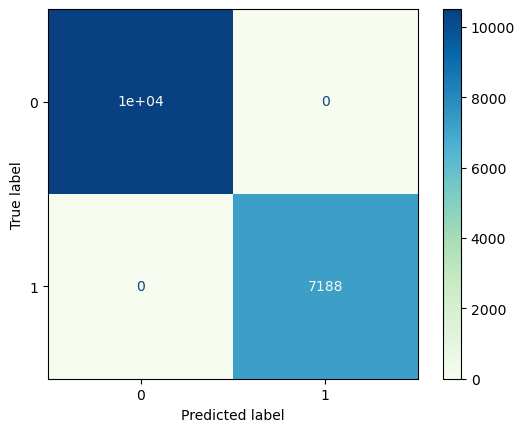

In [ ]:
from sklearn import metrics

# confusion matrix
confusion_matrix = metrics.plot_confusion_matrix(lr, X_test, y_test, cmap = "GnBu")
print(confusion_matrix)

# accuracy
print(classification_report(y_test, y_pred))
